# Basics of MLP
- Objective: create vanilla neural networks (i.e., Multilayer perceptrons) for simple regression/classification tasks with Keras

## MLP Structures
- Each MLP model is consisted of one input layer, several hidden layers, and one output layer
- Number of neurons in each layer is not limited
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" style="width: 300px"/>
<br>
<center>**MLP with one hidden layer**</center>
- Number of input neurons: 3
- Number of hidden neurons: 4
- Number of output neurons: 2


<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" style="width: 500px"/>
<br>
<center>**MLP with two hidden layers**</center>
- Number of input neurons: 3
- Number of hidden neurons: (4, 4)
- Number of output neurons: 1


## MLP for Regression tasks
- When the target (**y**) is continuous (real)
- For loss function and evaluation metric, mean squared error (MSE) is commonly used

In [29]:
from tensorflow.keras.datasets import boston_housing

In [30]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

### Dataset Description
- Boston housing dataset has total 506 data instances (404 training & 102 test)
- 13 attributes (features) to predict "the median values of the houses at a location"
- Doc: https://keras.io/datasets/

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### 1. Creating a model
- Keras model object can be created with Sequential class
- At the outset, the model is empty per se. It is completed by **'adding'** additional layers and compilation
- Doc: https://keras.io/models/sequential/

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential()

### 1-1. Adding layers
- Keras layers can be **added** to the model
- Adding layers are like stacking lego blocks one by one
- Doc: https://keras.io/layers/core/

In [34]:
from tensorflow.keras.layers import Activation, Dense

In [35]:
# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(10, input_shape = (13,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem

In [8]:
# This is equivalent to the above code block
model.add(Dense(10, input_shape = (13,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 activation_9 (Activation)   (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

### 1-2. Model compile
- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated
    - Doc (optimizers): https://keras.io/optimizers/
    - Doc (losses): https://keras.io/losses/

In [37]:
from tensorflow.keras import optimizers

In [38]:
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer

In [39]:
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed

### Summary of the model

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 activation_9 (Activation)   (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

### 2. Training
- Training the model with training data provided

In [41]:
history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 327.6651 - mse: 327.6651
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 97.5916 - mse: 97.5916
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 84.6956 - mse: 84.6956
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 84.1953 - mse: 84.1953
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 83.8861 - mse: 83.8861
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 83.9224 - mse: 83.9224
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 83.9450 - mse: 83.9450
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 83.2349 - mse: 83.2349
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 83.1777 - mse: 83.1777
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 82.6528 - mse: 82.6528
Epoch 11/100
9/9 [==============================] - 0s 2m

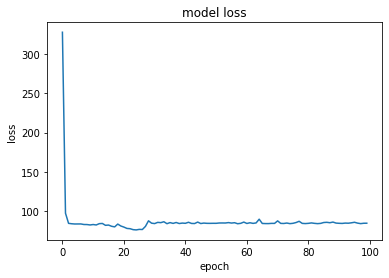

In [44]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [45]:
results = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 88.2029 - mse: 88.2029


In [46]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'mse']
[88.20287322998047, 88.20287322998047]


In [47]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  88.20287322998047
mse:  88.20287322998047


## MLP for classification tasks
- When the target (**y**) is discrete (categorical)
- For loss function, cross-entropy is used and for evaluation metric, accuracy is commonly used

### Dataset Description
- CIFAR-10 dataset contains 60,000 images in 10 classes - 50,000 for training and 10,000 for testing
- For more information, refer to [this Wikipedia article](https://en.wikipedia.org/wiki/CIFAR-10) or [Alex Krizhevsky's web site](https://www.cs.toronto.edu/~kriz/cifar.html)

In [48]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [49]:
# load data and flatten X data to fit into MLP
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 3072) (10000, 3072) (50000, 10) (10000, 10)


### 1. Creating a model
- Same with regression model - use ```Sequential()```

In [50]:
model = Sequential()

### 1-1. Adding layers
- Keras layers can be **added** to the model
- Adding layers are like stacking lego blocks one by one
- It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added
- Doc: https://keras.io/layers/core/

In [51]:
# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(50, input_shape = (x_train.shape[-1],)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(50))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(50))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                          # Output layer => output dimension = 1 since it is regression problem
model.add(Activation('sigmoid'))

In [ ]:
# This is equivalent to the above code block
model.add(Dense(50, input_shape = (x_train.shape[-1],), activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))

### 1-2. Model compile
- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated
    - Doc (optimizers): https://keras.io/optimizers/
    - Doc (losses): https://keras.io/losses/

In [52]:
from tensorflow.keras import optimizers

In [53]:
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

/home/dhanyaharish/Documents/GitHub/deep-learning/pytorch/DL/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [54]:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Summary of the model

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                153650    
                                                                 
 activation_10 (Activation)  (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 activation_11 (Activation)  (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 activation_12 (Activation)  (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

### 2. Training
- Training the model with training data provided

In [56]:
history=model.fit(x_train, y_train, batch_size = 128, epochs = 50, verbose = 1)

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 2.3168 - accuracy: 0.1181
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2925 - accuracy: 0.1615
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2871 - accuracy: 0.1840
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 2.2811 - accuracy: 0.1909
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 2.2745 - accuracy: 0.2030
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2657 - accuracy: 0.2019
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2547 - accuracy: 0.2094
Epoch 8/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2398 - accuracy: 0.2069
Epoch 9/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2209 - accuracy: 0.2103
Epoch 10/50
391/391 [==============================] - 2s 5ms/step - loss: 2.1982 - accuracy: 0.2090

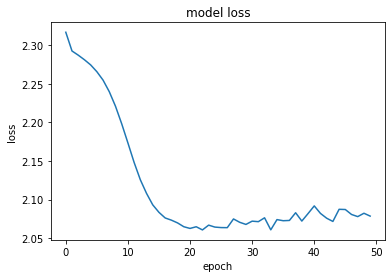

In [64]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [61]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0808 - accuracy: 0.2249


In [62]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'accuracy']
[2.080775737762451, 0.2249000072479248]


In [63]:
# printing out the results separately
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  2.080775737762451
accuracy:  0.2249000072479248
